In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import hvplot.pandas
from scipy.stats import linregress

from api_keys import bea_key


In [4]:
clean_hurricane_hpi_df = pd.read_csv('Output_CSVs/clean_hurricane_hpi_data.csv')
clean_hurricane_hpi_df

,Name,Max Winds (kt),Adjusted Costs,County,State,Year -1,Year,Year +1,Year +2,Annual Change (%) -1,...,Annual Change (%) +2,HPI -1,HPI,HPI +1,HPI +2,National AC Mean -1,National AC Mean,National AC Mean +1,National AC Mean +2,State AC Mean
0,Alicia,100.0,$9.4B,Galveston,TX,1982.0,1983,1984.0,1985.0,-2.03,...,-4.40,161.13,164.63,167.34,159.99,0.541563,7.587261,3.699267,3.385471,9.237719
1,Elena,100.0,$3.8B,Harrison,MS,1984.0,1985,1986.0,1987.0,4.57,...,-5.08,177.04,191.15,196.94,186.93,3.699267,3.385471,4.370415,3.346563,6.701818
2,Hugo,120.0,$22.7B,Charleston,SC,1988.0,1989,1990.0,1991.0,5.89,...,2.84,263.90,274.79,285.80,293.90,3.771567,4.693742,3.376380,2.888433,3.666923
3,Andrew,145.0,$60.2B,Miami-Dade,FL,1991.0,1992,1993.0,1994.0,2.09,...,4.36,239.18,246.02,261.13,272.52,2.888433,2.964494,3.405174,4.412623,2.358750
4,Opal,100.0,$9.6B,Escambia,FL,1994.0,1995,1996.0,1997.0,3.43,...,5.62,203.44,213.16,224.56,237.17,4.412623,5.662343,3.964860,4.171120,3.318936
5,Fran,100.0,$10.0B,Brunswick,NC,1995.0,1996,1997.0,1998.0,8.11,...,7.20,192.77,203.54,221.57,237.51,5.662343,3.964860,4.171120,3.897114,3.822892
6,Georges,90.0,$11.5B,Monroe,FL,1997.0,1998,1999.0,2000.0,6.20,...,14.89,292.04,313.55,331.92,381.35,4.171120,3.897114,3.715123,5.010387,4.533208
7,Georges,90.0,$11.5B,Harrison,MS,1997.0,1998,1999.0,2000.0,4.08,...,5.58,243.21,256.11,270.82,285.95,4.171120,3.897114,3.715123,5.010387,4.278913
8,Floyd,90.0,$12.1B,Brunswick,NC,1998.0,1999,2000.0,2001.0,7.20,...,5.06,237.51,252.09,272.55,286.34,3.897114,3.715123,5.010387,5.332035,3.728211
9,Isabel,90.0,$9.3B,Carteret,NC,2002.0,2003,2004.0,2005.0,3.61,...,22.29,205.27,214.98,234.23,286.44,3.722936,3.060076,6.162917,8.699377,2.179596


In [9]:
base_url = 'https://apps.bea.gov/api/data'

bea_url = f'{base_url}?&UserID={bea_key}&method=getparameterlist&datasetname=Regional&ResultFormat=JSON'

In [10]:
bea_json = requests.get(bea_url).json()


In [11]:
new_url = f'{base_url}?&UserID={bea_key}&method=GetData&datasetname=Regional&TableName=CAINC1&LineCode=3&GeoFIPS=DE&Year=2014&ResultFormat=JSON'



In [12]:
new_json = requests.get(new_url).json()


In [13]:
county_url = f'{base_url}?&UserID={bea_key}&method=GetData&datasetname=Regional&TableName=CAINC1&LineCode=1&Year=2012,2013&GeoFips=COUNTY&ResultFormat=json'


In [14]:
county_json = requests.get(county_url).json()


In [3]:
#Calculate mean annual change for counties affect by hurricanes
prev_ac = clean_hurricane_hpi_df['Annual Change (%) -1'].mean()
ac = clean_hurricane_hpi_df['Annual Change (%)'].mean()
ac1 = clean_hurricane_hpi_df['Annual Change (%) +1'].mean()
ac2 = clean_hurricane_hpi_df['Annual Change (%) +2'].mean()
print(prev_ac,ac,ac1,ac2)

5.876410256410256 8.001282051282049 10.541282051282051 6.049230769230769


In [4]:
#Calculate mean annual change for the whole nation
nat_prev_ac = clean_hurricane_hpi_df['National AC Mean -1'].mean()
nat_ac = clean_hurricane_hpi_df['National AC Mean'].mean()
nat_ac1 = clean_hurricane_hpi_df['National AC Mean +1'].mean()
nat_ac2 = clean_hurricane_hpi_df['National AC Mean +2'].mean()
print(nat_prev_ac,nat_ac,nat_ac1,nat_ac2)

3.4625312792237346 4.567459862161466 5.948100033619863 5.7944846660769525


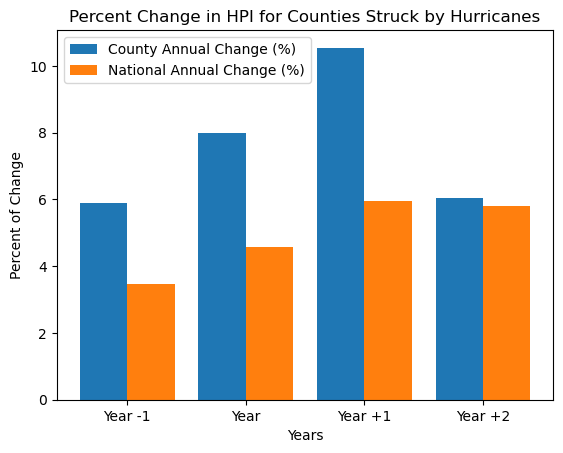

In [5]:
bars = ['Year -1','Year','Year +1','Year +2']
acs = [prev_ac,ac,ac1,ac2]
nat_acs = [nat_prev_ac,nat_ac,nat_ac1,nat_ac2]

x_axis = np.arange(len(bars)) 
  
plt.bar(x_axis - 0.2, acs, 0.4, label = 'County Annual Change (%)') 
plt.bar(x_axis + 0.2, nat_acs, 0.4, label = 'National Annual Change (%)') 
  
plt.xticks(x_axis, bars) 
plt.xlabel("Years") 
plt.ylabel("Percent of Change") 
plt.title("Percent Change in HPI for Counties Struck by Hurricanes") 
plt.legend() 
plt.show() 

In [17]:
#Save hurricanes df to directory
hurricanes_df = pd.read_csv('Output_CSVs/hurricanes_df.csv')

#Save Merged df to directory
hpi_df = pd.read_csv('Output_CSVs/hpi_df.csv')

#Save clean df as CSV to directory
clean_hurricane_hpi_df = pd.read_csv('Output_CSVs/clean_hurricane_hpi_data.csv')
hpi_df.head()

,State,County,FIPS code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,Year -1,Year +1,Year +2,Year +3,Annual Change (%) -1,Annual Change (%) +1,Annual Change (%) +2,Annual Change (%) +3,HPI -1,HPI +1,HPI +2,HPI +3
0,AL,Autauga,1001,1986,NaN,100.00,95.59,70.96,NaN,1987.0,1988.0,1989.0,NaN,-1.94,2.57,4.32,NaN,98.06,100.58,104.92
1,AL,Autauga,1001,1987,-1.94,98.06,93.74,69.59,1986.0,1988.0,1989.0,1990.0,NaN,2.57,4.32,-0.29,100.00,100.58,104.92,104.62
2,AL,Autauga,1001,1988,2.57,100.58,96.14,71.38,1987.0,1989.0,1990.0,1991.0,-1.94,4.32,-0.29,2.52,98.06,104.92,104.62,107.25
3,AL,Autauga,1001,1989,4.32,104.92,100.29,74.46,1988.0,1990.0,1991.0,1992.0,2.57,-0.29,2.52,3.09,100.58,104.62,107.25,110.57
4,AL,Autauga,1001,1990,-0.29,104.62,100.00,74.24,1989.0,1991.0,1992.0,1993.0,4.32,2.52,3.09,3.35,104.92,107.25,110.57,114.28


In [26]:
by_nation = hpi_df.groupby(['Year'])
change_by_nation = by_nation['Annual Change (%)'].agg(['mean','median'])
change_by_nation

,mean,median
Year,,
1975,NaN,NaN
1976,7.012998,7.490
1977,11.236533,10.670
1978,13.301912,13.600
1979,13.148394,12.480
1980,7.598505,7.450
1981,4.597900,5.010
1982,0.541563,0.950
1983,7.587261,5.725


In [19]:
by_state = hpi_df.groupby(['State','Year'])
change_by_state = by_state['Annual Change (%)'].agg(['mean','median'])
change_by_state

mean  median
State Year                   
AK    1975        NaN     NaN
      1976   7.550000   7.550
      1977   4.780000   4.780
      1978  11.830000  11.830
      1979  11.200000  11.200
...               ...     ...
WY    2019   3.885000   3.795
      2020   3.487727   3.625
      2021   9.633636   9.390
      2022  15.822727  15.125
      2023   4.909524   5.900

[2497 rows x 2 columns]

In [25]:
merged_df = pd.merge(hpi_df,change_by_nation,on = ['Year'],how='outer')
merged_df2 = pd.merge(merged_df,change_by_state,on=['Year','State'],how='outer')
clean_merged = merged_df2.rename(columns={'mean_x':'National Mean','median_x':'National Median',
                                          'mean_y':'State Mean','median_y':'State Median'})
clean_merged

,State,County,FIPS code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,Year -1,Year +1,...,Annual Change (%) +2,Annual Change (%) +3,HPI -1,HPI +1,HPI +2,HPI +3,National Mean,National Median,State Mean,State Median
0,AK,Anchorage,2020,1975,NaN,100.00,56.05,38.81,2023.0,1976.0,...,9.52,8.93,288.26,109.25,119.65,130.33,NaN,NaN,NaN,NaN
1,AK,Fairbanks North Star,2090,1975,NaN,100.00,68.79,44.33,2023.0,1976.0,...,0.04,14.73,608.92,105.85,105.90,121.50,NaN,NaN,NaN,NaN
2,AL,Jefferson,1073,1975,NaN,100.00,47.95,32.53,2023.0,1976.0,...,9.94,11.49,330.46,108.90,119.73,133.49,NaN,NaN,NaN,NaN
3,AL,Lee,1081,1975,NaN,100.00,52.68,37.30,2023.0,1976.0,...,0.11,6.73,305.53,111.57,111.68,119.20,NaN,NaN,NaN,NaN
4,AL,Madison,1089,1975,NaN,100.00,39.81,33.06,2023.0,1976.0,...,11.16,5.39,169.70,110.27,122.58,129.18,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100427,WY,Sweetwater,56037,2023,6.56,673.62,343.66,237.06,2022.0,1986.0,...,-3.01,1.93,632.15,100.00,96.99,98.86,7.85995,7.63,4.909524,5.9
100428,WY,Teton,56039,2023,NaN,NaN,NaN,NaN,2022.0,1982.0,...,2.60,-1.63,1179.97,100.00,102.60,100.93,7.85995,7.63,4.909524,5.9
100429,WY,Uinta,56041,2023,2.77,361.18,521.19,297.72,2022.0,1992.0,...,7.61,8.63,351.46,100.00,107.61,116.89,7.85995,7.63,4.909524,5.9
100430,WY,Washakie,56043,2023,17.92,392.60,NaN,265.75,2022.0,1996.0,...,3.37,2.23,332.95,100.00,103.37,105.67,7.85995,7.63,4.909524,5.9


In [ ]:
by_state = hpi_df_csv.groupby(['State','Year'])
change_by_state = by_state['Annual Change (%)'].agg(['mean'])
change_by_state = change_by_state.reset_index(level=1)
change_by_state

In [ ]:
prev_mean_state = []
mean_state_1 = []
mean_state_2 = []
mean_state_3 = []

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index-1]
        prev_mean_state.append(value2)
    except:
        prev_mean_state.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+1,'mean']
        mean_state_1.append(value2)
    except:
        mean_state_1.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+2,'mean']
        mean_state_2.append(value2)
    except:
        mean_state_2.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+3,'mean']
        mean_state_3.append(value2)
    except:
        mean_state_3.append('')

change_by_state['State AC Mean -1'] = prev_mean_state
change_by_state['State AC Mean +1'] = mean_state_1
change_by_state['State AC Mean +2'] = mean_state_2
change_by_state['State AC Mean +3'] = mean_state_3
change_by_state